In [ ]:
# Install Ultralytics YOLO
!pip install ultralytics

# Check GPU availability
import torch
print(f"GPU Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
else:
    print("WARNING: No GPU detected!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.1 MB/s eta 0:00:00
GPU Available: True
GPU Name: Tesla T4
GPU Memory: 15.83 GB


In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Extract dataset
print("Extracting dataset...")
!unzip -q '/content/drive/MyDrive/Minor_Project/Big_cats_Dataset.zip' -d /content/

# Verify extraction
print("\nDataset structure:")
!ls -la /content/Big_cats_Dataset/



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Extracting dataset...

Dataset structure:
total 32
drwxrwxrwx 5 root root 4096 Nov  5 12:12 .
drwxr-xr-x 1 root root 4096 Nov  5 12:40 ..
-rw-rw-rw- 1 root root  304 Nov  5 12:10 data.yaml
-rw-rw-rw- 1 root root  148 Nov  5 12:10 README.dataset.txt
-rw-rw-rw- 1 root root  925 Nov  5 12:10 README.roboflow.txt
drwxrwxrwx 4 root root 4096 Nov  5 12:10 test
drwxrwxrwx 4 root root 4096 Nov  5 12:11 train
drwxrwxrwx 4 root root 4096 Nov  5 12:12 valid


'# Check if images exist\nprint("\nChecking train images:")\n!ls /content/Big_cats_Dataset/train/images/ | head -5'

In [ ]:
# Check if images exist
print("\nChecking train images:")
!ls /content/Big_cats_Dataset/train/images/ | head -5


Checking train images:
0001_jpg.rf.7ba1e0864fc6c068a0106ac8fa87465e.jpg
0001_jpg.rf.fca733b9d372e5a4baf67d5556576a40.jpg
0003_jpg.rf.26516b9459acde8fe97fad632b9721b1.jpg
0003_jpg.rf.524a78c420c8467067c8d7ec3cb8831e.jpg
0004_jpg.rf.68b2815c78aff0831fdd11e56b3c74d3.jpg


In [ ]:
from ultralytics import YOLO

# Load pretrained model
print("Loading YOLOv8 model...")
model = YOLO('yolov8n.pt')

print("\n" + "="*60)
print("STARTING TRAINING")
print("="*60)

# Train the model
results = model.train(
    data='/content/Big_cats_Dataset/data.yaml',
    epochs=20,
    imgsz=640,
    batch=32,
    device=0,
    workers=8,
    cache=True,
    amp=True,
    patience=50,
    project='Big_cats_detection',
    name='yolov8_colab_run',
    verbose=True,
    plots=True
)

print("\n" + "="*60)
print("✓ TRAINING COMPLETED!")
print("="*60)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Loading YOLOv8 model...

STARTING TRAINING
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Big_cats_Dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_

Validating model on test set...
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 17.5±15.7 MB/s, size: 59.1 KB)
val: Scanning /content/Big_cats_Dataset/valid/labels.cache... 641 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 641/641 1.2Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 41/41 4.9it/s 8.3s
                   all        641        712      0.949      0.882       0.95      0.664
               Leopard        200        211      0.971        0.8      0.952      0.564
                  Lion         60         67      0.941       0.91      0.959      0.633
                 Tiger        170        183      0.969      0.956      0.977      0.797
                 citah        211        251      0.915      0.861      0.912      0.663
Speed: 2.2ms

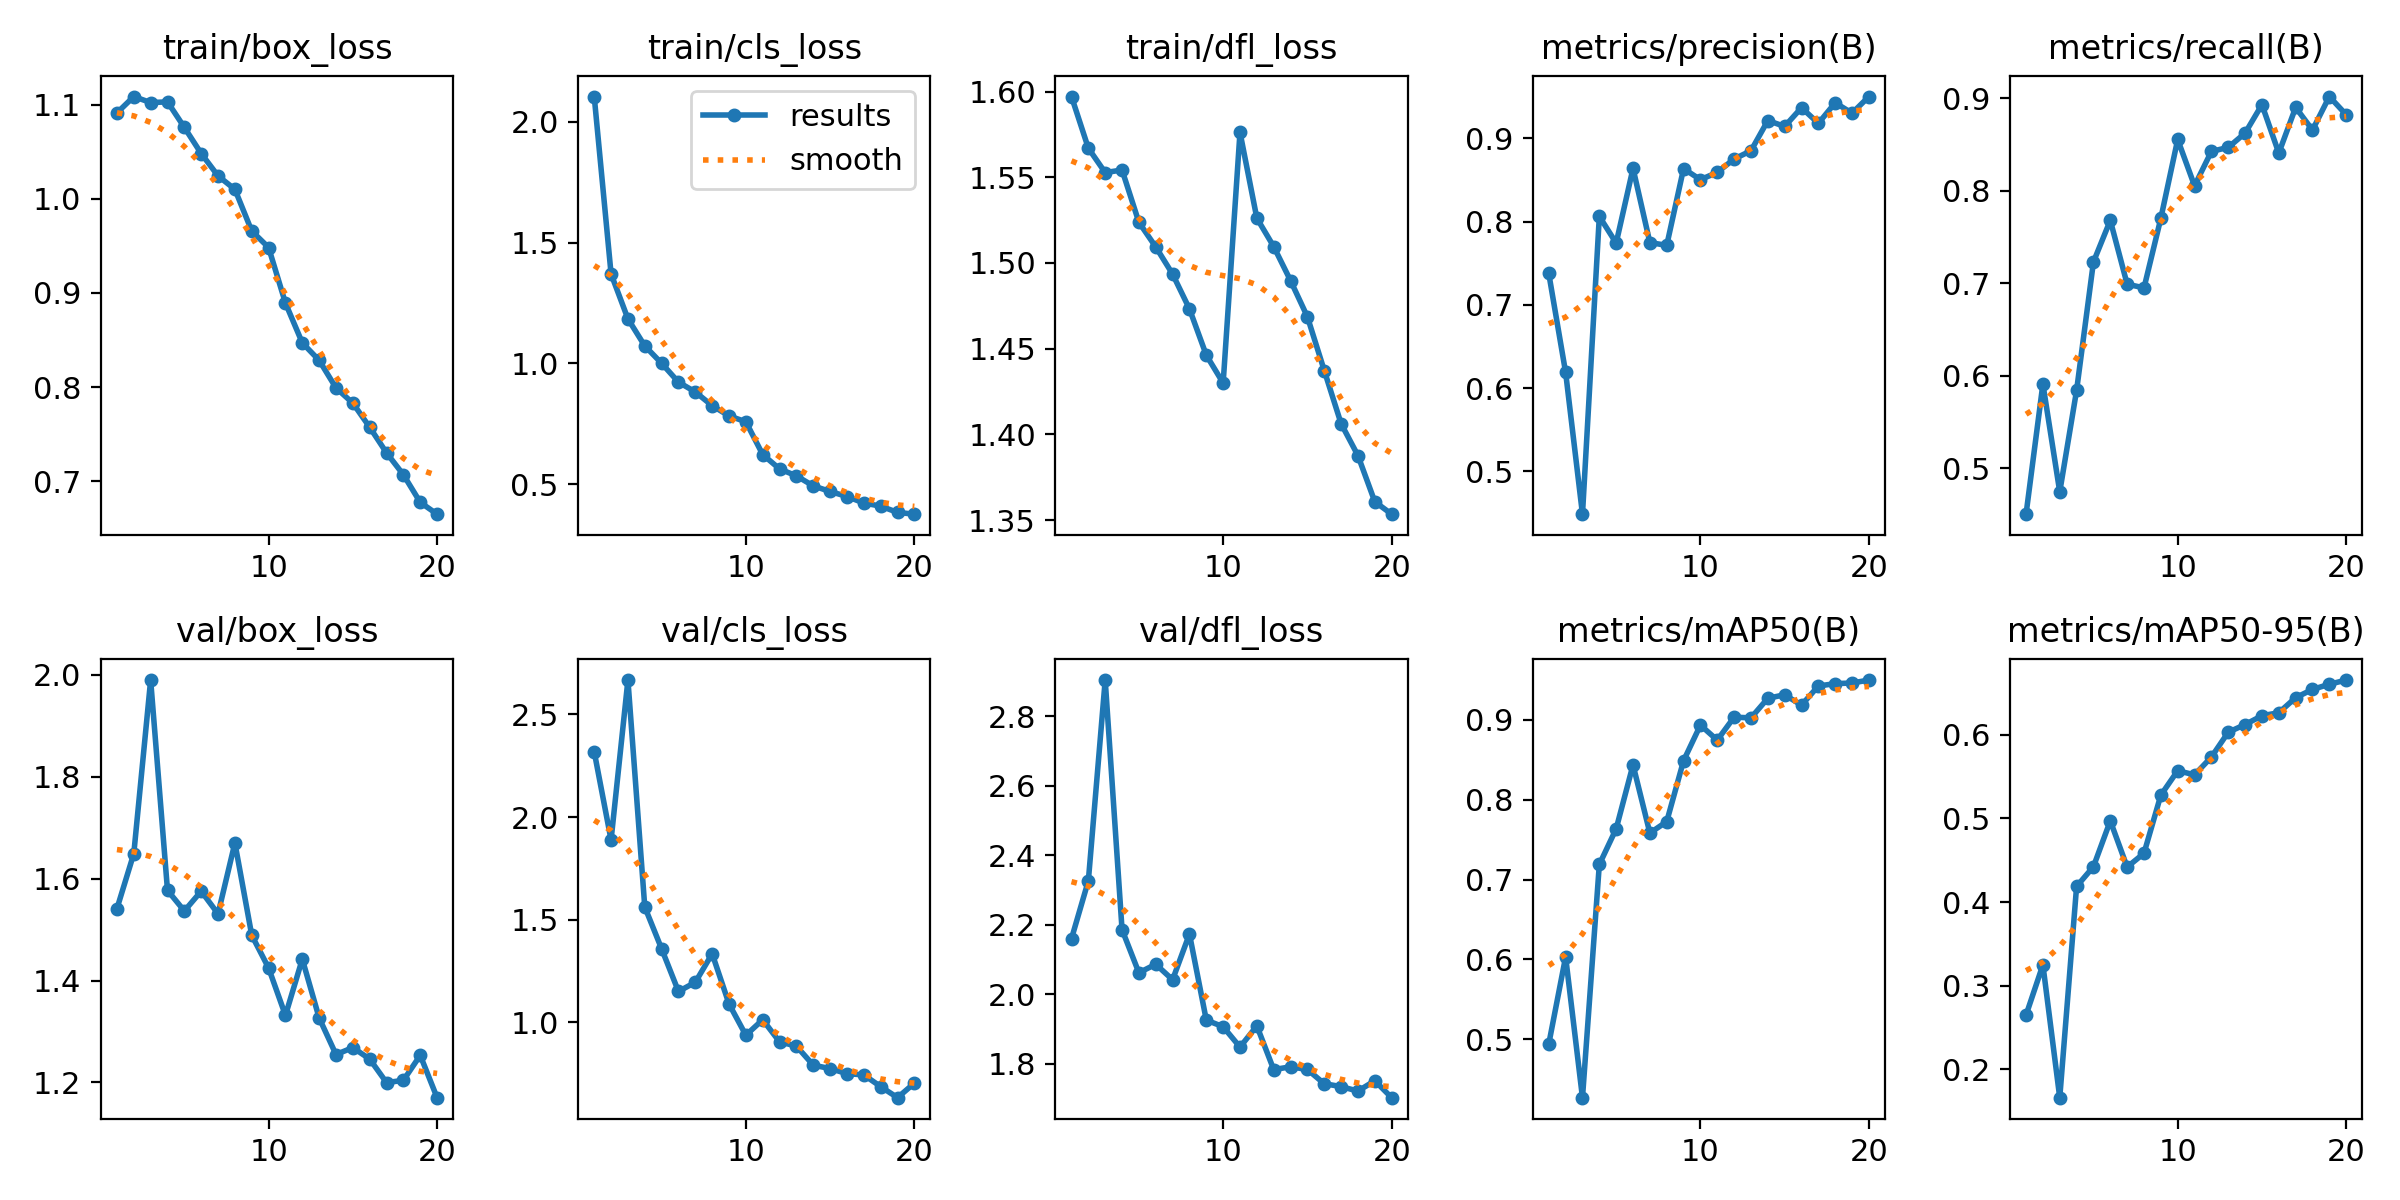


 Confusion Matrix:


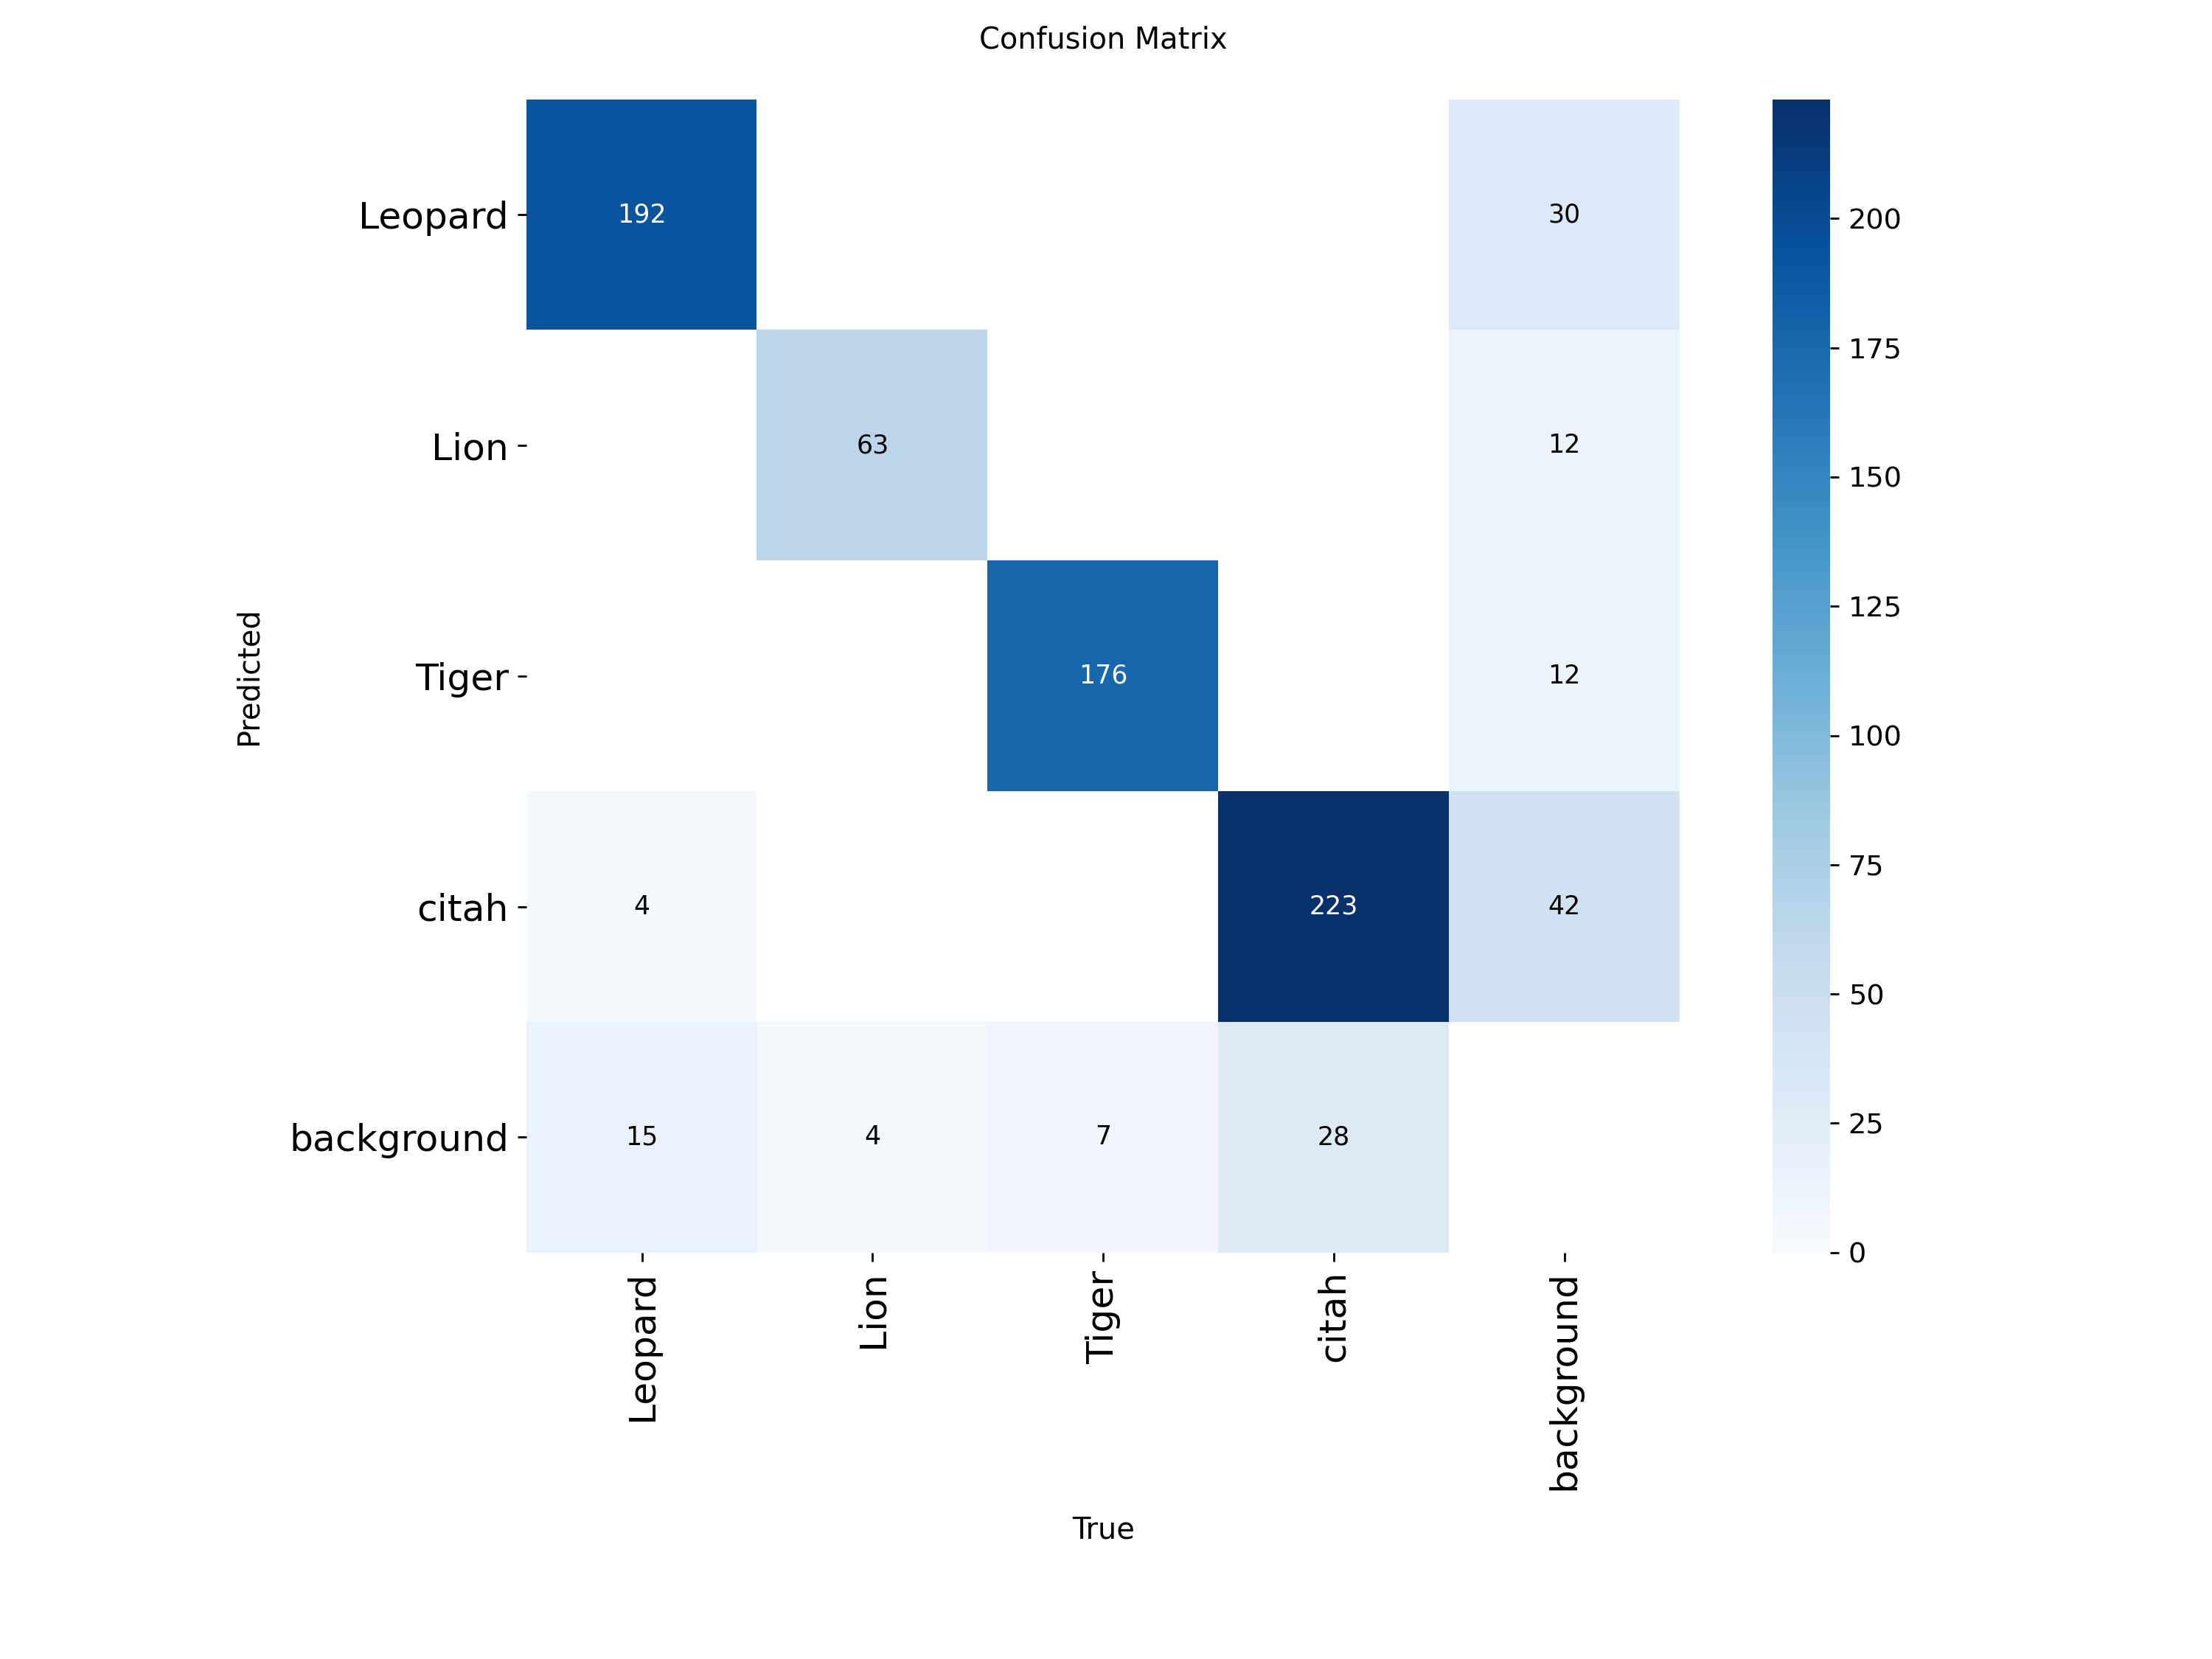

In [ ]:
# Validate the model
print("Validating model on test set...")
metrics = model.val()

print("\n" + "="*60)
print("VALIDATION METRICS")
print("="*60)
print(f"mAP50-95: {metrics.box.map:.4f}")
print(f"mAP50: {metrics.box.map50:.4f}")
print(f"mAP75: {metrics.box.map75:.4f}")
print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall: {metrics.box.mr:.4f}")

# Display training plots
from IPython.display import Image, display

print("\n Training Results:")
display(Image('Big_cats_detection/yolov8_colab_run/results.png'))

print("\n Confusion Matrix:")
display(Image('Big_cats_detection/yolov8_colab_run/confusion_matrix.png'))

Running predictions on test set...

image 1/119 /content/Big_cats_Dataset/test/images/0020_jpg.rf.099760a98838b2ac1d9ae67a635cc44d.jpg: 640x640 1 Tiger, 7.4ms
image 2/119 /content/Big_cats_Dataset/test/images/0030_jpg.rf.0d7b30e399780b7267e8dc299c72428a.jpg: 640x640 1 Tiger, 7.3ms
image 3/119 /content/Big_cats_Dataset/test/images/0034_jpg.rf.07940072e1e6d405f3fc867d75bbadaf.jpg: 640x640 1 Tiger, 7.3ms
image 4/119 /content/Big_cats_Dataset/test/images/0081_jpg.rf.30f0e1277270c9f9a6fdaedbd9a39164.jpg: 640x640 1 Tiger, 7.3ms
image 5/119 /content/Big_cats_Dataset/test/images/00ef4ae70d5d14acda130caa05c936e4_jpg.rf.8d181305226ed6940786c027c821ca9e.jpg: 640x640 1 Lion, 7.3ms
image 6/119 /content/Big_cats_Dataset/test/images/0119_jpg.rf.d8a38b016a7ae667c3f0341ab5a29d41.jpg: 640x640 1 Tiger, 7.3ms
image 7/119 /content/Big_cats_Dataset/test/images/0131_jpg.rf.e2f8cebe3421afe8b67fb3495b13af92.jpg: 640x640 1 Tiger, 7.3ms
image 8/119 /content/Big_cats_Dataset/test/images/0135_jpg.rf.f35897692f89c6

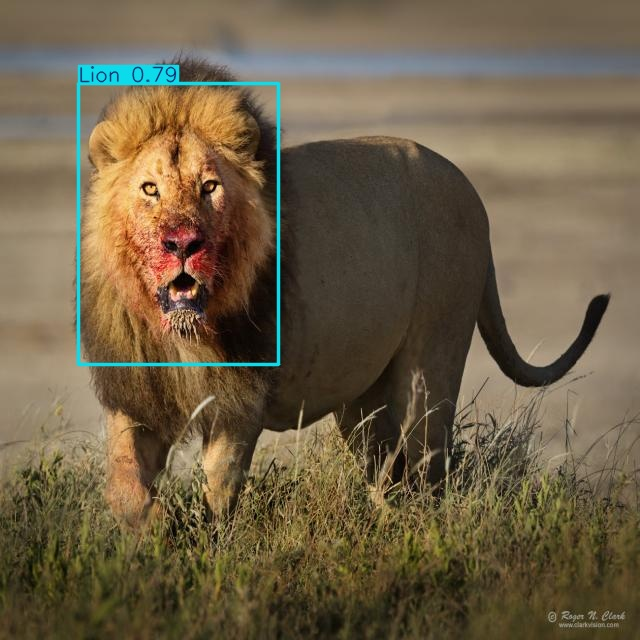

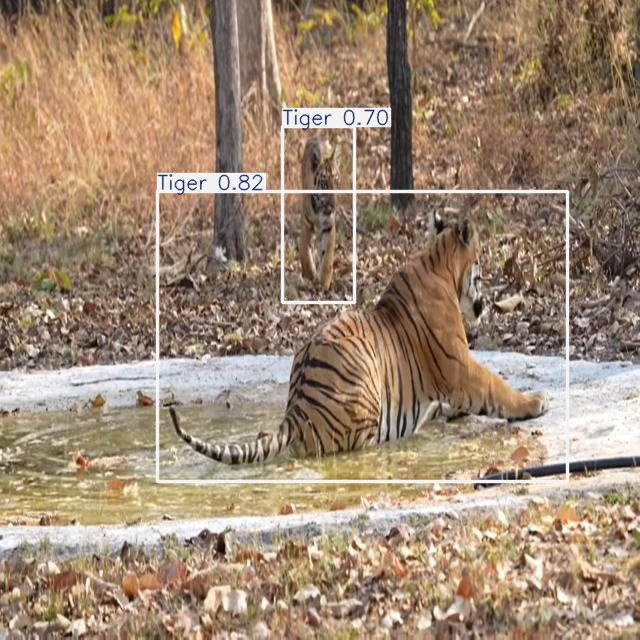

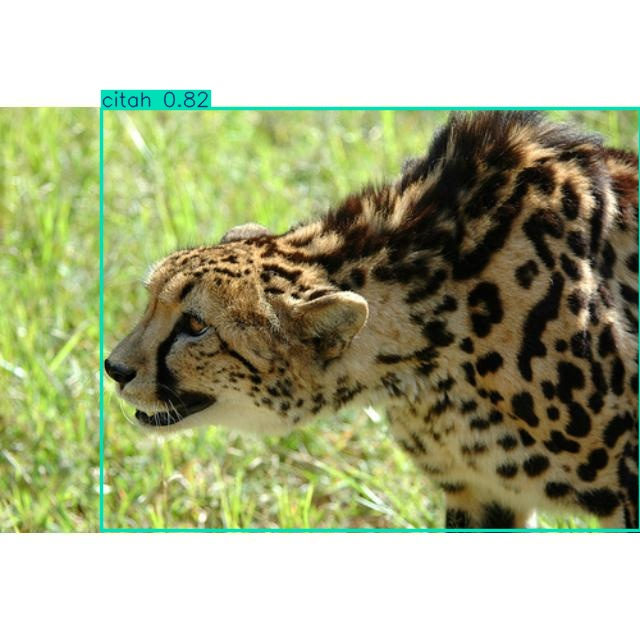

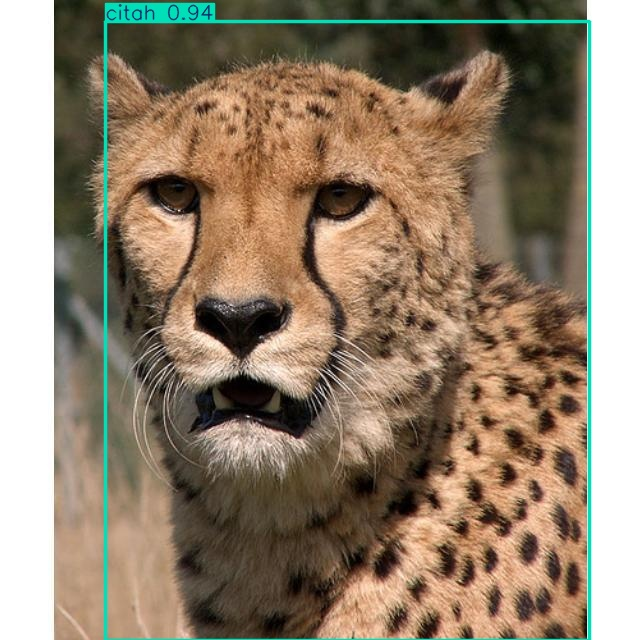

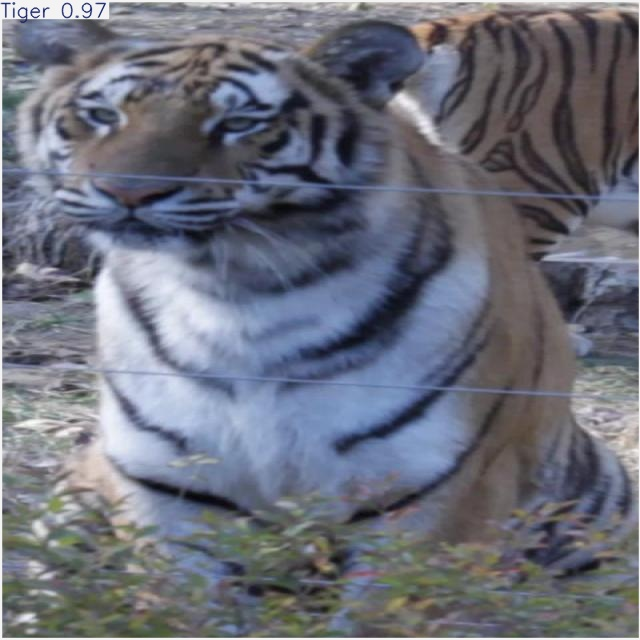

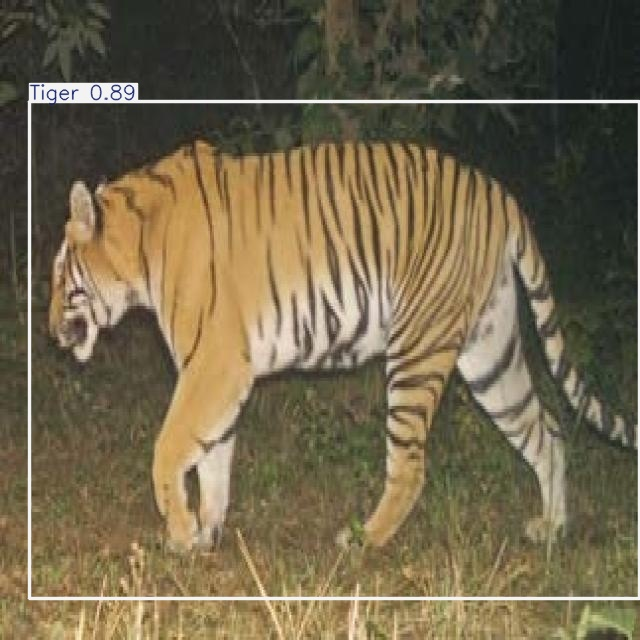

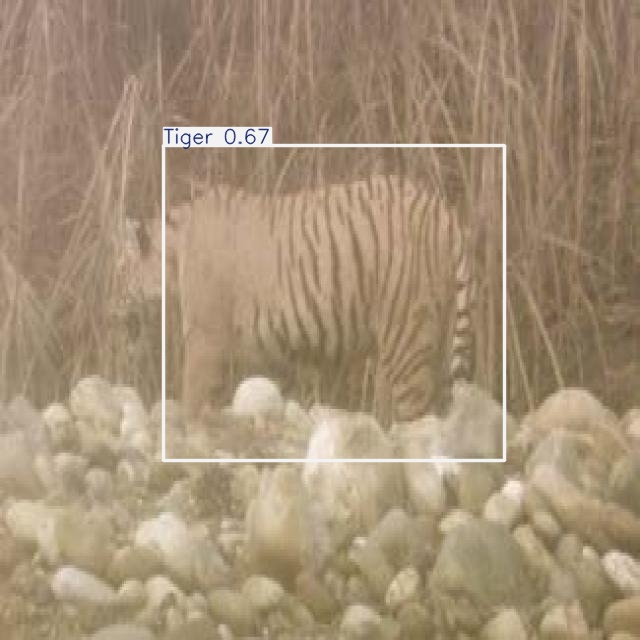

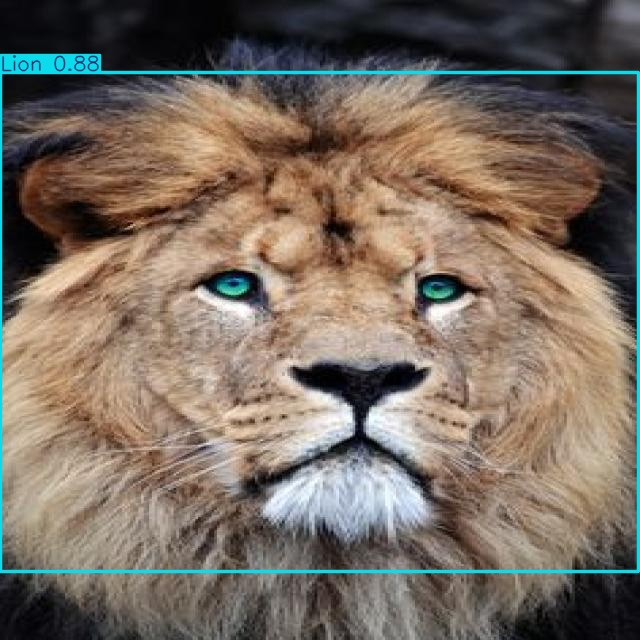

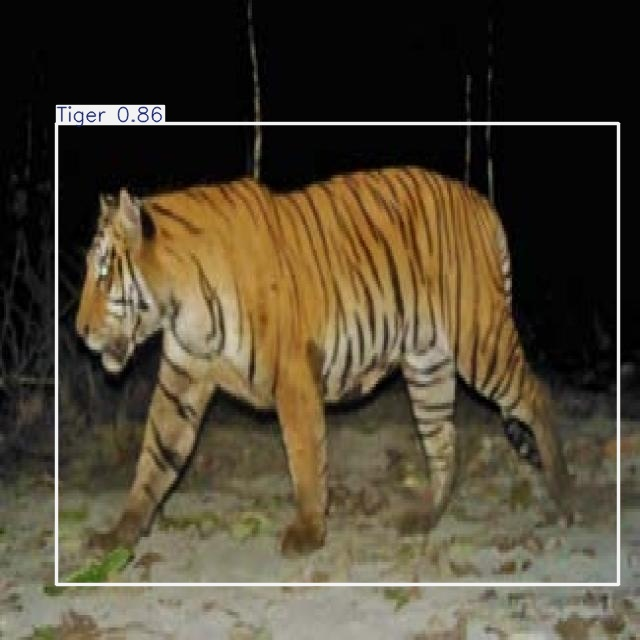

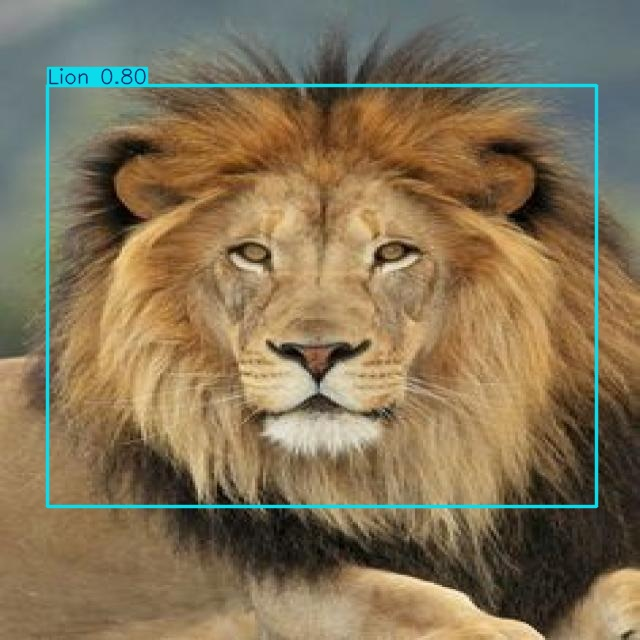

In [ ]:
# Run predictions on test images
print("Running predictions on test set...")
results = model.predict(
    source='/content/Big_cats_Dataset/test/images',
    save=True,
    conf=0.25,
    project='predictions',
    name='test_results'
)

print("\n✓ Predictions complete!")
print("Check the 'predictions/test_results' folder for results")

# Display a few predictions
import glob
from IPython.display import Image, display

prediction_images = glob.glob('predictions/test_results/*.jpg')[:10]
print(f"\nShowing first 10 predictions:")
for img_path in prediction_images:
    display(Image(img_path, width=500))

In [ ]:
from google.colab import files
import shutil

# Create a zip of all results
print("Creating results archive...")
shutil.make_archive('yolov8_trained_model', 'zip', 'Big_cats_detection/yolov8_colab_run')

# Download the trained model
print("Downloading trained model...")
files.download('yolov8_trained_model.zip')

# Also download just the best weights
files.download('Big_cats_detection/yolov8_colab_run/weights/best.pt')

print("\n✓ Downloads complete!")
print("\nFiles downloaded:")
print("1. yolov8_trained_model.zip - Full training results")
print("2. best.pt - Best model weights")

Creating results archive...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✓ Downloads complete!

Files downloaded:
1. yolov8_trained_model.zip - Full training results
